<a href="https://colab.research.google.com/github/dustyattenborough/lectures-bigphys/blob/master/springLR01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

빅데이터 물리학 첫번째 예제

이 노트북은 빅데이터 물리학 예제입니다. 파이선기초를 하겠습니다.

In [ ]:
#빅데이터 물리학 첫번쨰 예제


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from google.colab import files
import os
import torch
#from math import *

과제:깃헙에 올리고 풀리퀘스트 하기
여러개 하모닉 오실레이터 하기

In [ ]:
print(1,2,3, sep = " : ",end="  endofline")

1 : 2 : 3  endofline

In [ ]:
if __name__=='__main__':
  print("this is main")

this is main


Text(0.5, 1.0, 'sho')

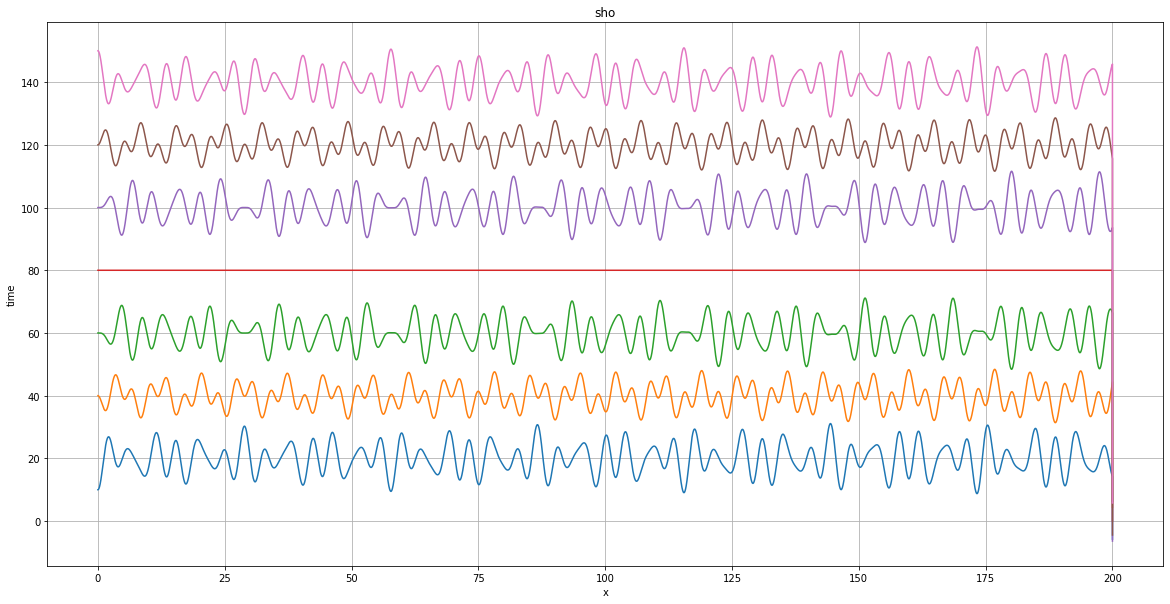

In [5]:
# 좌우 파동
n=7
k_l=[1,1,1,1,1,1,1,1] #i th spring

m_l=[1,1,1,1,1,1,1] # i th mass

x0_l=[-10,0,0,0,0,0,10] # i th dx
a0_l=[0,0,0,0,0,0,0]
v0_l=[0,0,0,0,0,0,0]

set_l=[20,40,60,80,100,120,140] # i 번째 의 기본 위치

x_l=[[0]]
v_l=[[0]]
a_l=[[0]]
vhf_l=[]

for q in range(n):
  x_l.append([x0_l[q]])
  v_l.append([v0_l[q]])
  a_l.append([a0_l[q]])
  vhf_l.append([])

x_l.append([0])
v_l.append([0])
a_l.append([0])

time0=[0]

dt=0.001



for i in range(200000):
  for ii in range(n):
    a_l[ii+1].append((-1*k_l[ii]*(x_l[ii+1][i]-x_l[ii][i]))*(1/m_l[ii])+(k_l[ii+1]*(x_l[ii+2][i]-x_l[ii+1][i])/m_l[ii]))
  for jj in range(n):
    vhf_l[jj].append(v_l[jj+1][i]+a_l[jj+1][i]*(dt/2))
  for kk in range(n):
    x_l[kk+1].append(x_l[kk+1][i]+vhf_l[kk][i]*dt)
  for ll in range(n):
    v_l[ll+1].append(vhf_l[ll][i]+a_l[ll+1][i+1]*(dt/2))
  x_l[0].append(0)
  x_l[n+1].append(0)
  v_l[0].append(0)
  v_l[n+1].append(0)
  a_l[0].append(0)
  a_l[n+1].append(0)
  time0.append(time0[i]+dt)

for j in range(200000):
  for k in range(n):
    x_l[k+1][j]+=set_l[k]


figure=plt.figure(figsize=(20,10))
for it in range(n):
  plt.plot(time0,x_l[it+1])
plt.xlabel('x')
plt.ylabel('time')
plt.grid(True)

plt.title("sho")

Text(0.5, 1.0, 'sho')

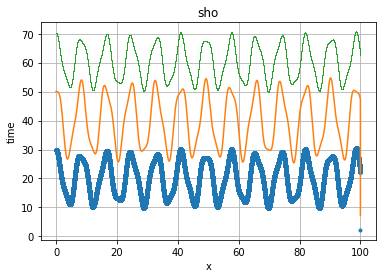

In [ ]:
# 좌우파동(기본 셋)

k_l=[1,1,1,1] #i th spring

m_l=[1,1,1] # i th mass

x0_l=[10,10,10] # i th dx

set_l=[20,40,60] # i 번째 의 기본 위치

x1=[x0_l[0]]
x2=[x0_l[1]]
x3=[x0_l[2]]

v1=[0]
v2=[0]
v3=[0]

vhf1=[]
vhf2=[]
vhf3=[]

a1=[0]
a2=[0]
a3=[0]

time0=[0]

dt=0.001



for i in range(100000):
  a1.append((-1*k_l[0]*(x1[i])+k_l[1]*(x2[i]-x1[i]))/m_l[0])
  a2.append((-1*k_l[1]*(x2[i]-x1[i]))*(1/m_l[1])+(k_l[2]*(x3[i]-x2[i])/m_l[1]))
  a3.append((-1*k_l[2]*(x3[i]-x2[i]))*(1/m_l[2])-(k_l[3]*x3[i]/m_l[2]))

  vhf1.append(v1[i]+a1[i]*(dt/2))
  vhf2.append(v2[i]+a2[i]*(dt/2))
  vhf3.append(v3[i]+a3[i]*(dt/2))

  x1.append(x1[i]+vhf1[i]*dt)
  x2.append(x2[i]+vhf2[i]*dt)
  x3.append(x3[i]+vhf3[i]*dt)

  v1.append(vhf1[i]+a1[i+1]*(dt/2))
  v2.append(vhf2[i]+a2[i+1]*(dt/2))
  v3.append(vhf3[i]+a3[i+1]*(dt/2))

  time0.append(time0[i]+dt)

for j in range(100000):
  x1[j]+=set_l[0]
  x2[j]+=set_l[1]  
  x3[j]+=set_l[2] 

#figure=plt.figure(figsize=(10,10))
plt.plot(time0,x1,".")
plt.plot(time0,x2,"-")
plt.plot(time0,x3,",")
plt.xlabel('x')
plt.ylabel('time')
plt.grid(True)

plt.title("sho")

In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f